<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Multiple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement Multiple Linear Regression
* Create a model, train it, test it and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates.default = "simple_white"
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

print ("All done")

All done


### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
for col in ["MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION"]:
    print(f"Number of unique values in column {col}: {df[col].nunique()}\n")

Number of unique values in column MAKE: 39

Number of unique values in column MODEL: 663

Number of unique values in column VEHICLECLASS: 16

Number of unique values in column TRANSMISSION: 22



In [5]:
FUELTYPE_df = pd.get_dummies(df["FUELTYPE"],prefix="FUELTYPE")

Let's select some features that we want to use for regression.


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf = pd.concat([cdf,FUELTYPE_df],join="outer",axis=1)
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,196,0,0,0,1
1,2.4,4,11.2,7.7,9.6,221,0,0,0,1
2,1.5,4,6.0,5.8,5.9,136,0,0,0,1
3,3.5,6,12.7,9.1,11.1,255,0,0,0,1
4,3.5,6,12.1,8.7,10.6,244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271,0,0,1,0
1063,3.2,6,13.2,9.5,11.5,264,0,0,1,0
1064,3.0,6,13.4,9.8,11.8,271,0,0,1,0
1065,3.2,6,12.9,9.3,11.3,260,0,0,1,0


Let's plot Emission values with respect to Engine size:


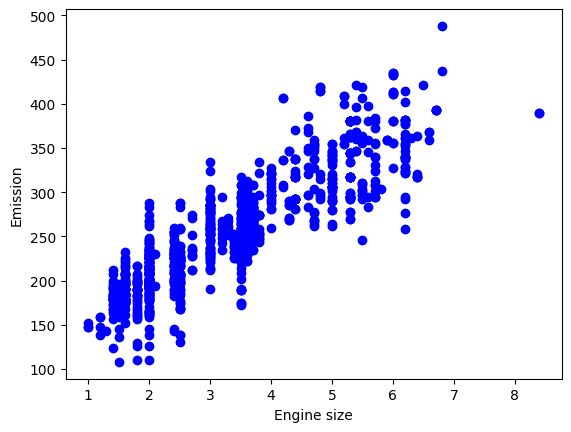

In [7]:
plt.scatter(cdf["ENGINESIZE"], cdf.CO2EMISSIONS,  color='blue',)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
train , test = train_test_split(cdf, test_size=0.2 , shuffle=True)

In [13]:
train.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
37,2.0,4,11.8,8.8,10.5,242,0,0,0,1
7,3.7,6,12.8,9.0,11.1,255,0,0,0,1


In [14]:
test.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
872,3.8,6,12.8,8.9,11.0,253,0,0,0,1
591,2.4,4,11.1,8.3,9.8,225,0,0,1,0


#### Train data distribution


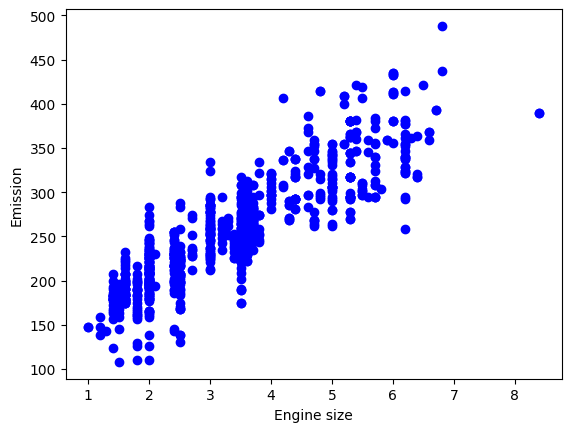

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [18]:
fig = px.scatter(data_frame=train,
                 x="ENGINESIZE",
                 y="CO2EMISSIONS",
                 trendline="ols",
                 trendline_color_override="red")
fig

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [22]:
#import module linear_model
from sklearn import linear_model

# create an instance from class LinearRegression()
regr = linear_model.LinearRegression()

In [23]:
regr

LinearRegression()

In [24]:
x = train[
    [
        "ENGINESIZE",
        "CYLINDERS",
        "FUELCONSUMPTION_COMB",
        "FUELTYPE_D",
        "FUELTYPE_E",
        "FUELTYPE_X",
        "FUELTYPE_Z",
    ]
]
y = train[["CO2EMISSIONS"]]

In [26]:
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[  0.83210341   1.38690411  21.0468222   51.18771804 -95.32833356
   21.9561892   22.18442632]]
Intercept:  [-11.14186721]


As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Prediction</h2>


In [27]:
y_hat= regr.predict(test[[
        "ENGINESIZE",
        "CYLINDERS",
        "FUELCONSUMPTION_COMB",
        "FUELTYPE_D",
        "FUELTYPE_E",
        "FUELTYPE_X",
        "FUELTYPE_Z"]])

In [28]:
x_test = test[
    [
        "ENGINESIZE",
        "CYLINDERS",
        "FUELCONSUMPTION_COMB",
        "FUELTYPE_D",
        "FUELTYPE_E",
        "FUELTYPE_X",
        "FUELTYPE_Z",
    ]
]
y_test = test[["CO2EMISSIONS"]]

In [29]:
# import metrics
from sklearn.metrics import mean_squared_error as mse, r2_score

In [34]:
print(f"Mean Squared Error (MSE): {mse(y_test, y_hat)}")

# Explained variance score: 1 is perfect prediction
print(f"Variance score using y_test and x_test: {regr.score(x_test,y_test)}")
print(f"R2 score using y_test and y_hat: {r2_score(y_test,y_hat)}")

Mean Squared Error (MSE): 53.826175442179746
Variance score using y_test and x_test: 0.9873539804972329
R2 score using y_test and y_hat: 0.9873539804972329


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.


<h2 id="practice">Practice</h2>
Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?


In [36]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS',
       'FUELTYPE_D', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z'],
      dtype='object')

In [46]:
# new df for independent variables
y = df["CO2EMISSIONS"]

In [47]:
x = df.drop(columns="CO2EMISSIONS")

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, shuffle=True, random_state=74
)

In [56]:
FUELTYPE_df = pd.get_dummies(x_train["FUELTYPE"], prefix="FUELTYPE")

In [57]:
x_train = x_train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]]

In [58]:
x_train = pd.concat([x_train,FUELTYPE_df], axis=1)

In [60]:
x_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
439,5.3,8,18.6,13.9,0,0,1,0
298,5.7,8,15.6,10.0,0,0,1,0
147,3.6,6,19.4,13.0,0,1,0,0
922,6.6,12,19.1,12.3,0,0,0,1
273,1.4,4,10.0,7.8,0,0,1,0


Do the same for x_test

In [61]:
FUELTYPE_df = pd.get_dummies(x_test["FUELTYPE"], prefix="FUELTYPE")
x_test = x_test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]]
x_test = pd.concat([x_test,FUELTYPE_df], axis=1)
x_test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
644,3.0,6,14.2,10.2,0,0,0,1
368,3.5,6,18.9,13.9,0,1,0,0
179,6.2,8,17.0,11.8,0,0,0,1
812,1.6,4,10.0,7.8,0,0,0,1
259,1.2,4,7.7,6.0,0,0,1,0


In [62]:
# train model
regr.fit(X=x_train,
         y=y_train)

LinearRegression()

In [63]:
# predict for test data
y_hat2 = regr.predict(x_test)

In [65]:
# evaluation of model
print (f"R2 score for test data: {r2_score(y_test, y_hat2)}")
print (f"Mean squared error for test data: {mse(y_test, y_hat2)}")

R2 score for test data: 0.9861961297222194
Mean squared error for test data: 55.48648017781789


In [66]:
# check the coefficients
regr.coef_

array([  1.14630157,   0.65411596,  12.97156647,   7.70374375,
        52.52024235, -96.23319374,  21.91517758,  21.79777381])

__Least impact on CO2 emission belongs to number of cylinders with coefficient of 0.65__

__Highest impact belongs to feul type with coefficients : 52.52024235, -96.23319374,  21.91517758,  21.79777381__

In [84]:
fig = px.bar(y=regr.coef_,
       x=x_test.columns,
       color=x_test.columns)

fig.update_legends(dict(title="Independent variables"))
fig.update_yaxes(dict(title="Coefficient values", showgrid=True))
fig.update_xaxes(dict(title="Independent variables"))

In [76]:
compare_df = pd.DataFrame({"Observed": y_test, "Calculated": y_hat2})

In [77]:
compare_df.reset_index(inplace=True, drop=True)
compare_df.head()

,Observed,Calculated
0,285,282.476640
1,267,254.489037
2,338,336.099413
3,207,206.594022
4,159,162.551563


In [80]:
fig = px.line(compare_df, title="Observed vs. calculated values")
fig.update_legends(dict(title="CO2 emisiion"))

Plot residuals

In [85]:
compare_df["Residuals"] = compare_df["Observed"] - compare_df["Calculated"]
compare_df.head()

,Observed,Calculated,Residuals
0,285,282.476640,2.523360
1,267,254.489037,12.510963
2,338,336.099413,1.900587
3,207,206.594022,0.405978
4,159,162.551563,-3.551563


In [98]:
fig = px.line(x=compare_df.index,
              y=compare_df["Residuals"],
              title="Residual values")

fig.add_annotation(dict(text="Max residual: 48.37", bgcolor='yellow',
                        x=67, y=48.37,
                        xref="x", yref="y"))
fig.add_annotation(dict(text="Seccond max residual: 41.72", bgcolor='yellow',
                        x=96, y=-41.72,
                        xref="x", yref="y"))
fig.update_xaxes(dict(title="Index"))
fig.update_yaxes(dict(title="Residual values", showgrid=True))